In [1]:
from pathlib import Path
from itertools import product
import matplotlib.pyplot as plt
from src.preprocessing import preprocessor
import pandas as pd
from src.linear_regression_forecast import lr_forecast

In [2]:
DATA_FOLDER = Path('../data/processed/')
STATES = ['CA', 'WI', 'TX']
STORES = [1, 2, 3, 4]

2016-04-23 00:00:00 2016-05-22 00:00:00
2012-01-29 00:00:00 2016-04-22 00:00:00


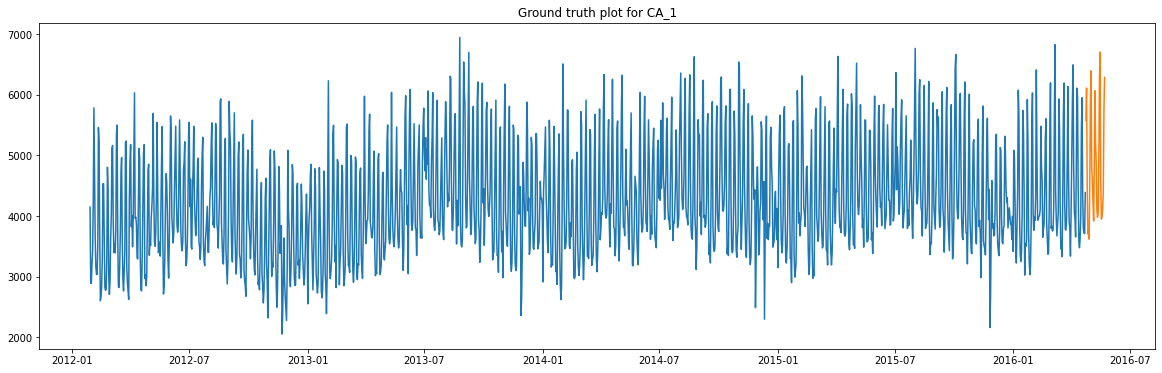

2016-04-23 00:00:00 2016-05-22 00:00:00
2012-01-29 00:00:00 2016-04-22 00:00:00


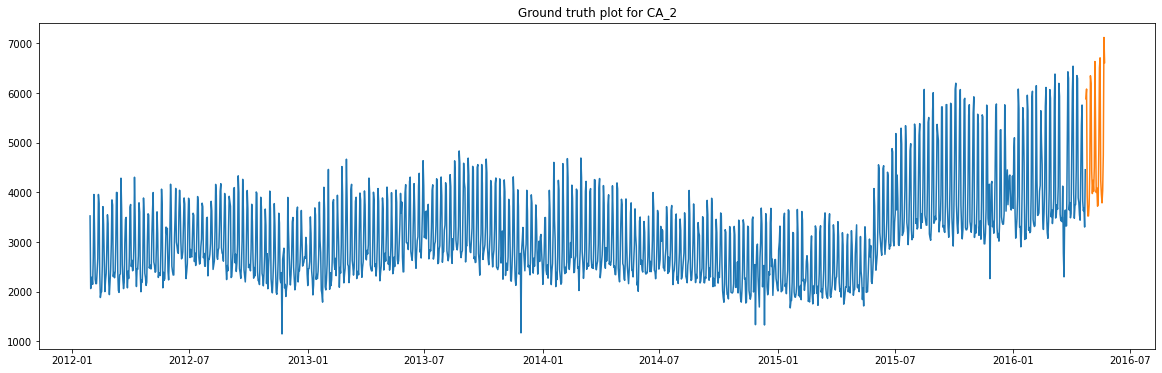

2016-04-23 00:00:00 2016-05-22 00:00:00
2012-01-29 00:00:00 2016-04-22 00:00:00


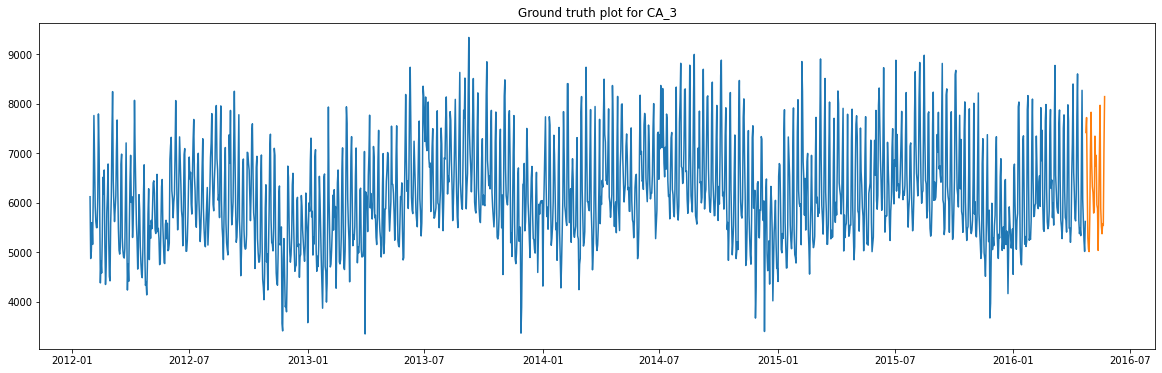

2016-04-23 00:00:00 2016-05-22 00:00:00
2012-01-29 00:00:00 2016-04-22 00:00:00


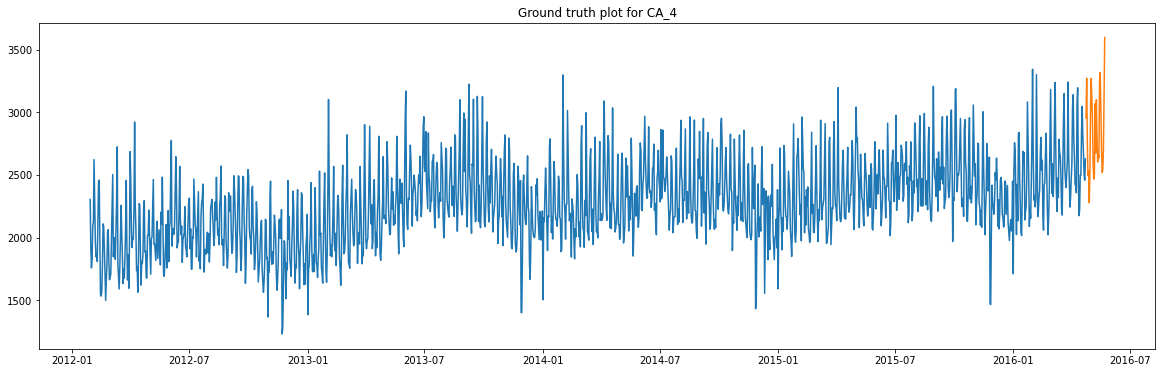

2016-04-23 00:00:00 2016-05-22 00:00:00
2012-01-29 00:00:00 2016-04-22 00:00:00


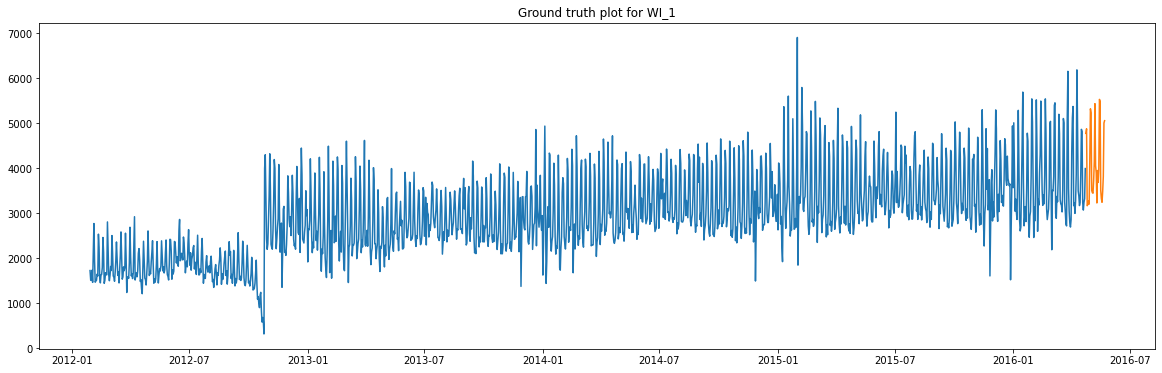

2016-04-23 00:00:00 2016-05-22 00:00:00
2012-01-29 00:00:00 2016-04-22 00:00:00


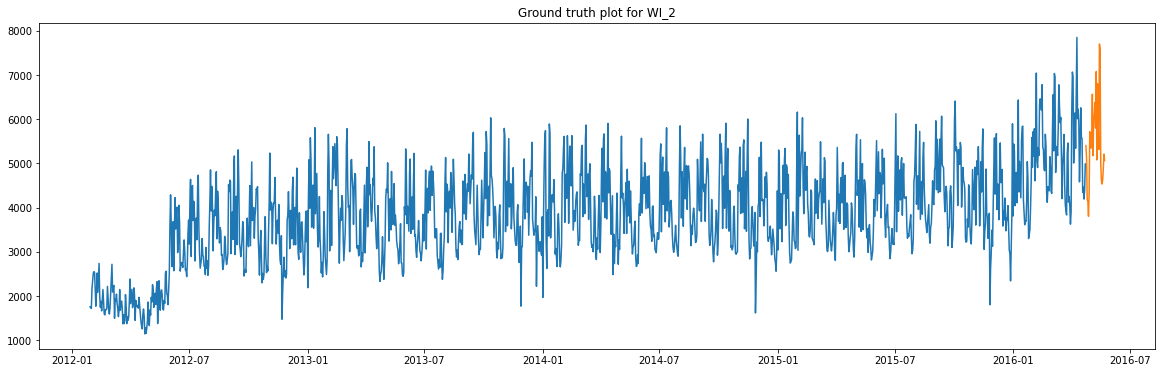

2016-04-23 00:00:00 2016-05-22 00:00:00
2012-01-29 00:00:00 2016-04-22 00:00:00


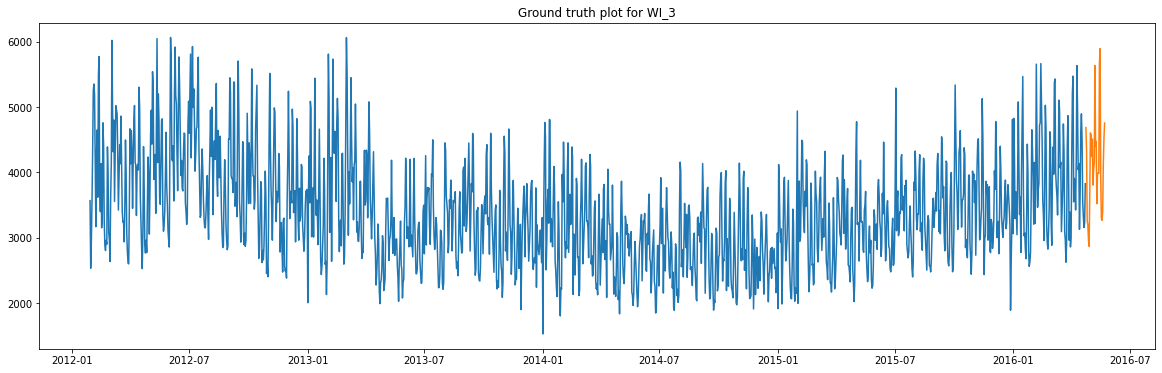

2016-04-23 00:00:00 2016-05-22 00:00:00
2012-01-29 00:00:00 2016-04-22 00:00:00


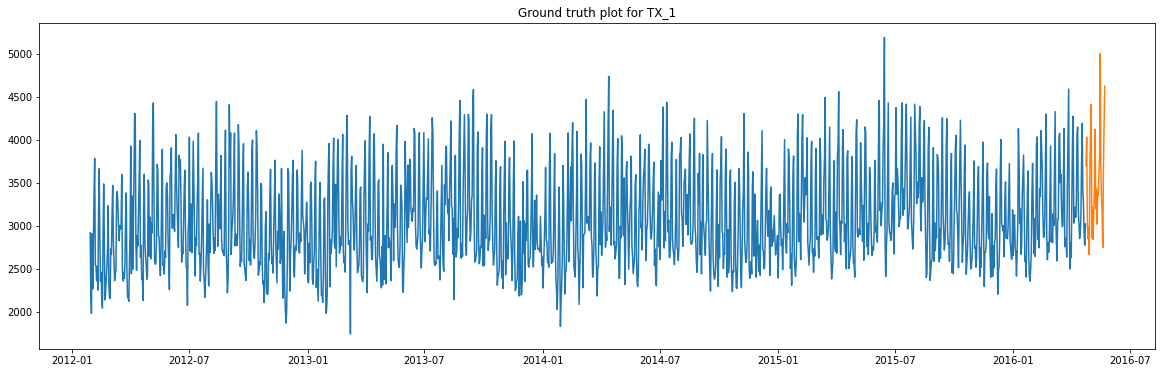

2016-04-23 00:00:00 2016-05-22 00:00:00
2012-01-29 00:00:00 2016-04-22 00:00:00


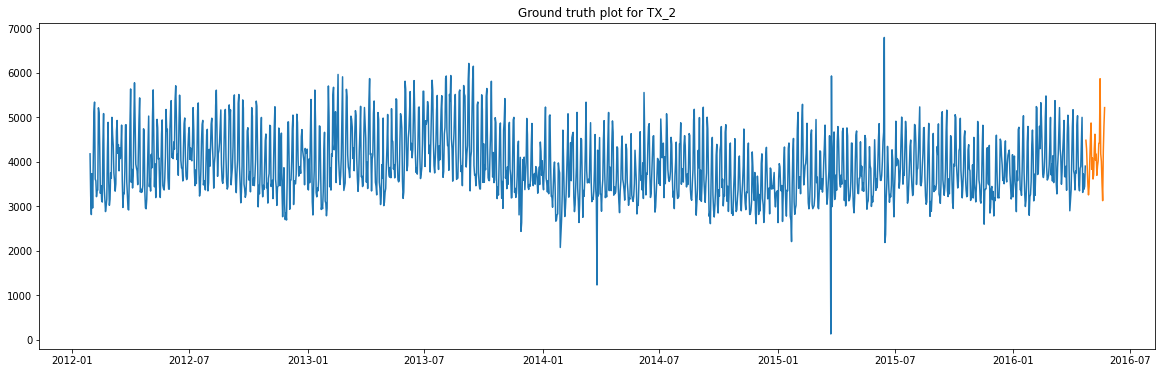

2016-04-23 00:00:00 2016-05-22 00:00:00
2012-01-29 00:00:00 2016-04-22 00:00:00


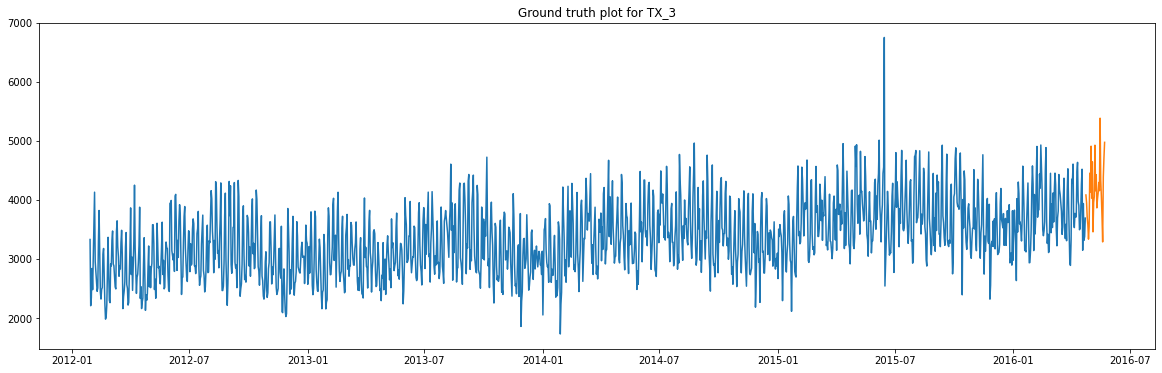

In [15]:
cat_cols = ['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'season']

for store in product(STATES, STORES):
    store_id = f'{store[0].upper()}_{store[1]}'
    store_data = DATA_FOLDER / Path(f'{store_id}_sales_data.csv')
    try:
        df = preprocessor.load_and_preprocess(store_data)
        X, y = lr_forecast.get_features_and_target(df=df, onehotencoding=cat_cols)
        X_train, X_test, y_train, y_test = lr_forecast.split_train_test(X, y)
        print(y_test.index[0], y_test.index[-1])
        print(y_train.index[0], y_train.index[-1])
        # create plot
        plt.figure(figsize=(20, 6))
        plt.plot(y_train.index, y_train, label='training')
        plt.plot(y_test.index, y_test, label='testing')
        plt.legend()
        plt.title(f'Ground truth plot for {store_id}')
        plt.show()
    except FileNotFoundError:
        pass